# Questions

## Increase in surface salinity in the arctic, is there some kind of trend in obersved data? What about models?

## How well does models represent the changes in salinity, and can they be used as a good indication for the future?

## How does sea surface salinity affect the vertical ocean circulation? And is this influence impactfull?

## What can we say about the sea surface salinity in the future, and how will this affect the vertical circulation in the arctic?


In [1]:
import functions as f
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import s3fs
import cftime
import intake
import numpy as np
from joblib import Parallel, delayed
from pyproj import Transformer
from datetime import datetime
import s3fs
%load_ext autoreload
%autoreload 2
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))

## Satellite data

In [127]:
import time
path='escience2022/Antoine/ESA_SMOS_Arctic_Sea_Surface_Salinity/'
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019]
start = time.time()
sat_data = f.collect_satellite_data(years, path)
print(time.time()-start)

224.00298309326172


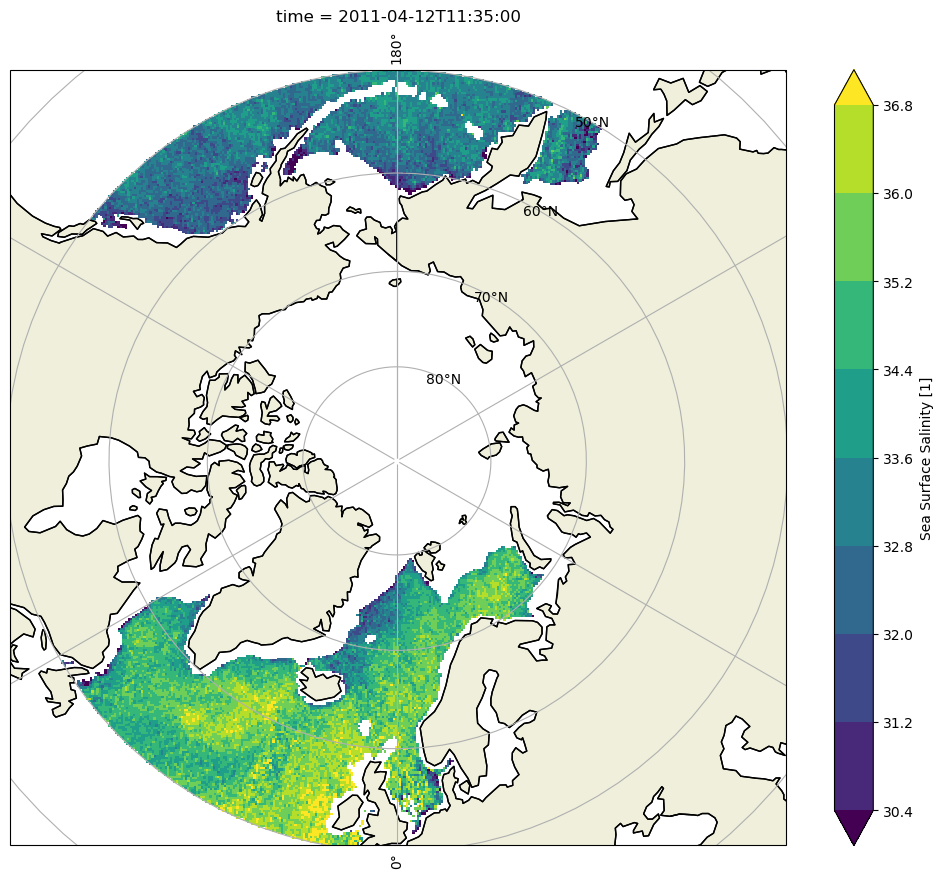

In [3]:
#dat = dat.where((dat['lat'] > 70) & (dat['lat'] < 80), drop=True)
#f.plot_sss_sat(dat['sss'], levels=50)

f.plot_sss_sat(sat_data['sss'][100])

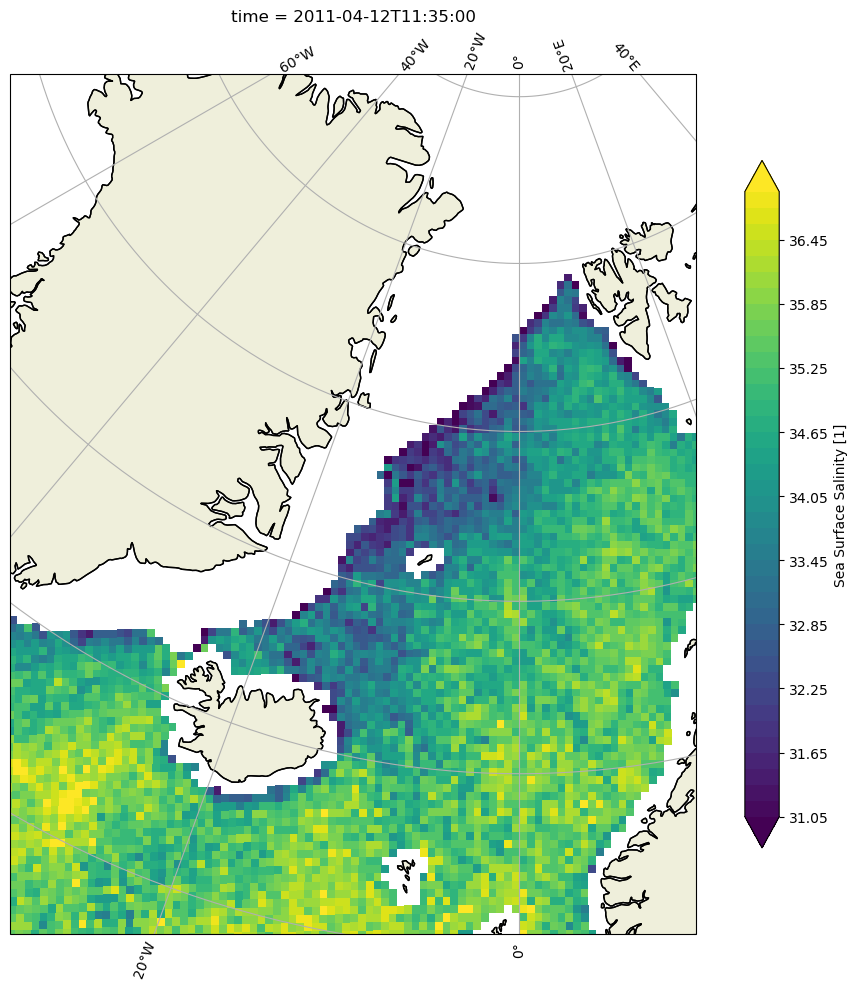

In [4]:
f.plot_sss_sat(sat_data['sss'][100], levels=50, extent=[-30,10,85,60], vmin=10, vmax=40)

In [5]:
sat_data

<xarray.Dataset>
Dimensions:  (time: 3285, y: 432, x: 432)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-02T21:32:30 ... 2019-12-30T12:33:30
  * y        (y) float32 -5.388e+06 -5.362e+06 ... 5.362e+06 5.388e+06
  * x        (x) float32 -5.388e+06 -5.362e+06 ... 5.362e+06 5.388e+06
    lat      (y, x) float32 16.62 16.82 17.02 17.22 ... 17.22 17.02 16.82 16.62
    lon      (y, x) float32 -45.0 -44.87 -44.73 -44.6 ... 135.3 135.1 135.0
Data variables:
    crs      (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    sss      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/48)
    title:                     Arctic Sea Surface Salinity L3 map
    institution:               Barcelona Expert Center (BEC), ICM-CSIC, Barce...
    institution_url:           http://bec.icm.csic.es
    summary:                   This dataset contains 9-day Level-3 Arctic sea...
    comment:                   These data were produced at BEC as part of the...
    source:                    SMOS L1B version 6.21
    ...                        ...
    sensor:                    SMOS/MIRAS
    spatial_resolution:        35km at nadir
    license:                   This product is distributed under Creative Com...
    license_url:               https://creativecommons.org/licenses/by/4.0/
    copyright:                 If this data is used for publication, the foll...
    doi:                       10.20350/digitalCSIC/12620

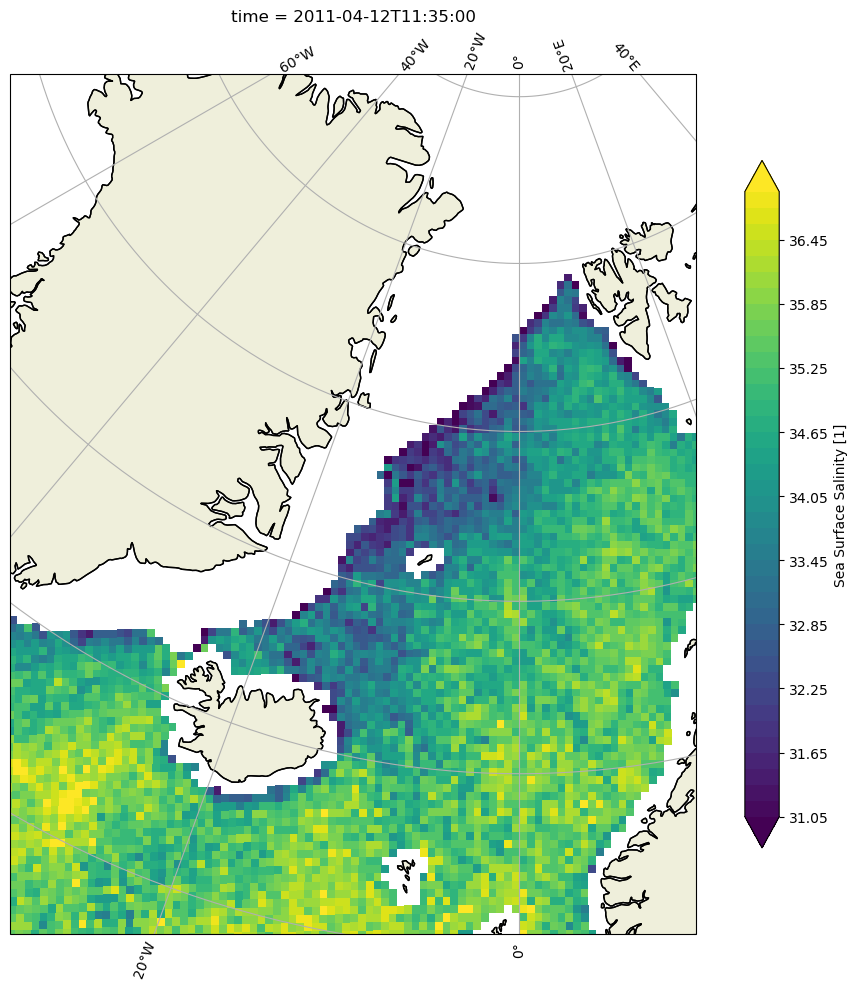

In [6]:
f.plot_sss_sat(sat_data['sss'][100], extent=[-30,10,85,60], levels=50, vmin=10, vmax=40)

<xarray.DataArray 'lat' (y: 101, x: 44)>
array([[65.81219 , 65.88502 , 65.955894, ..., 67.07063 , 67.0549  ,
        67.03693 ],
       [66.02913 , 66.10257 , 66.17406 , ..., 67.29884 , 67.28296 ,
        67.26482 ],
       [66.24574 , 66.31982 , 66.391914, ..., 67.52695 , 67.51091 ,
        67.49259 ],
       ...,
       [82.23195 , 82.45513 , 82.678215, ..., 88.347565, 88.14742 ,
        87.94238 ],
       [82.25138 , 82.47514 , 82.69883 , ..., 88.441185, 88.23042 ,
        88.01679 ],
       [82.264366, 82.48851 , 82.71261 , ..., 88.50685 , 88.287994,
        88.067986]], dtype=float32)
Coordinates:
  * y        (y) float32 -2.538e+06 -2.512e+06 ... -6.25e+04 -3.75e+04
  * x        (x) float32 -8.625e+05 -8.375e+05 ... 1.875e+05 2.125e+05
    lat      (y, x) float32 65.81 65.89 65.96 66.02 ... 88.72 88.51 88.29 88.07
    lon      (y, x) float32 -18.77 -18.27 -17.75 -17.24 ... 77.01 78.69 79.99
Attributes:
    standard_name:        latitude
    long_name:            latitude
    unit

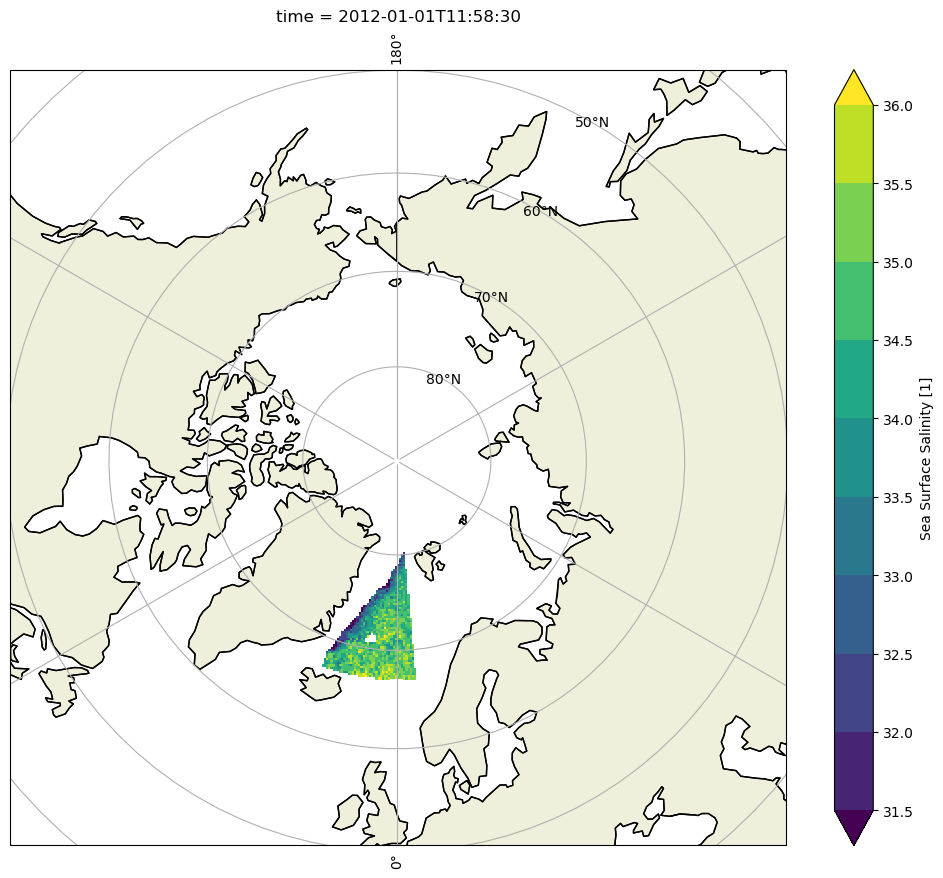

In [128]:
sliced = f.slice_data(sat_data, '2012-01-01', '2012-02-01', -20, 5, 67, 90)
f.plot_sss_sat(sliced['sss'][0])
sliced
print(sliced.lat)

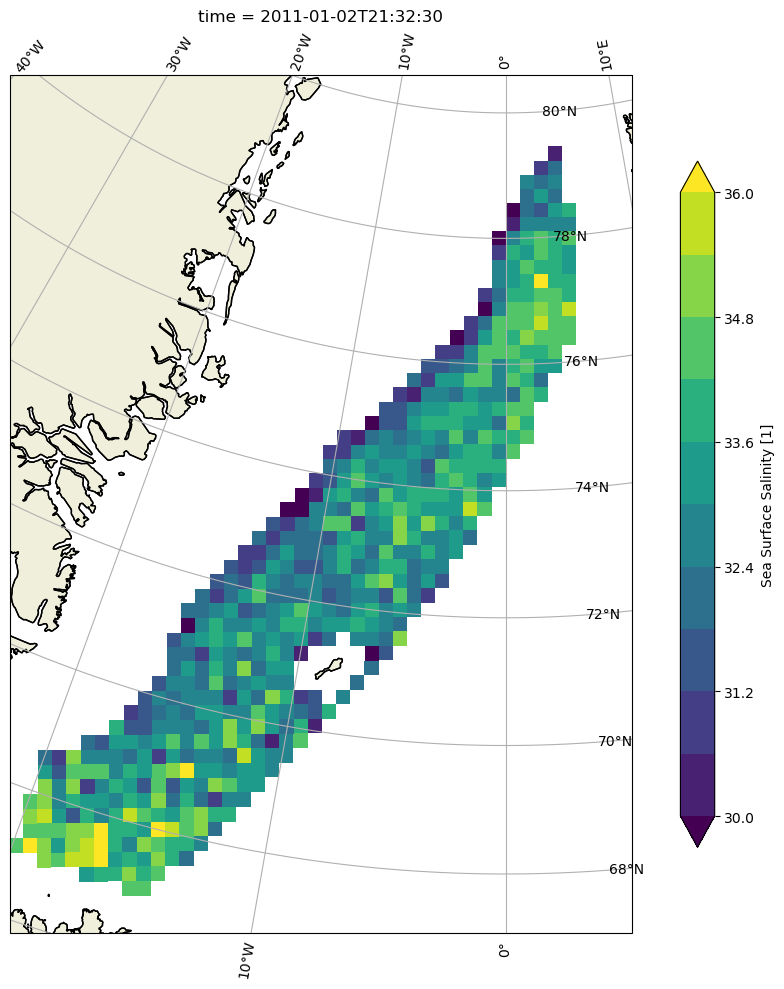

In [129]:

sliced = f.slice_data(sat_data, '2009-01-01', '2022-02-01', -20, 5, 67, 90)




min_lat = np.min(sliced['lat'])
min_lon = (np.min(sliced['lon'][0]))
max_lat = np.max(sliced['lat'])
max_lon = np.max(sliced['lon'][0])
a = (max_lat - min_lat)/(max_lon-min_lon)


sliced = sliced.where(sliced['lat']-(sliced['lon']/2) > min(min_lat-min_lon/2-1, max_lat-max_lon/2-1), drop=True)

#f.plot_sss_sat(s['sss'][0]-sliced['sss'][0], extent = [-20,5,65,90])
f.plot_sss_sat(sliced['sss'][0], extent = [-20,5,67,80])

In [9]:
month = sliced['time.month']
year = sliced['time.year']
month

<xarray.DataArray 'month' (time: 3285)>
array([ 1,  1,  1, ..., 12, 12, 12])
Coordinates:
  * time     (time) datetime64[ns] 2011-01-02T21:32:30 ... 2019-12-30T12:33:30

In [10]:
JAm = sliced.where((month.isin(1)) & (year.isin(2013))).mean('time')
JAm['sss'].mean()

<xarray.DataArray 'sss' ()>
array(34.470142, dtype=float32)

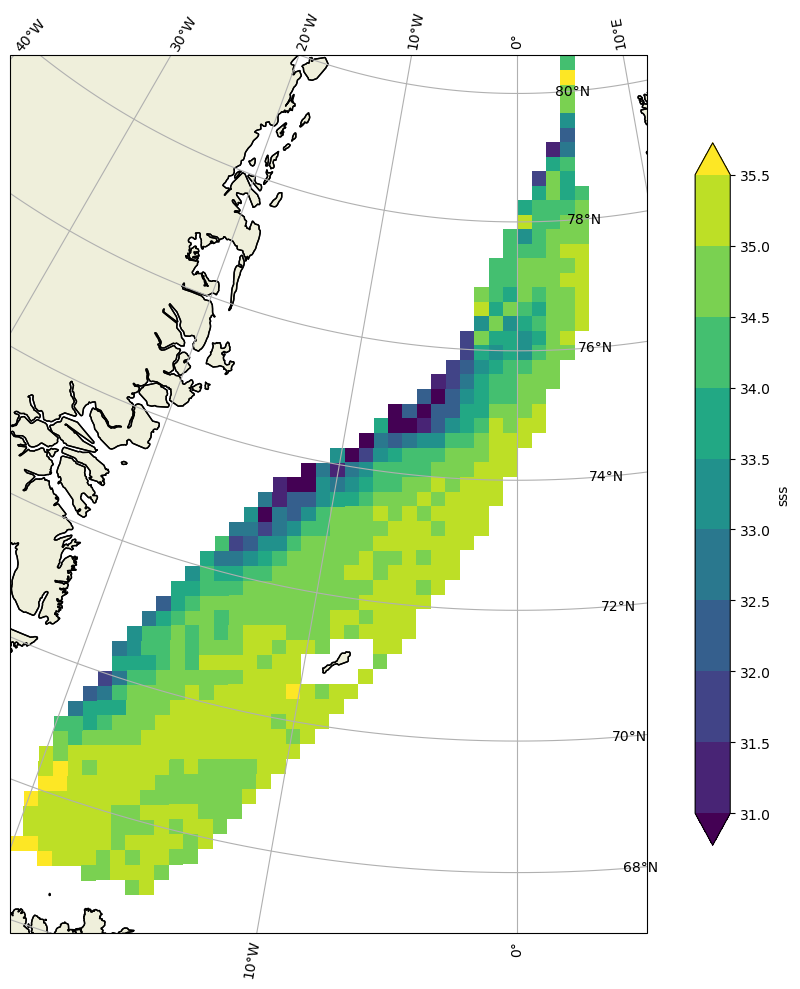

In [11]:
f.plot_sss_sat(JAm['sss'], extent = [-20,5,67,80])

## Seasonality

In [12]:
month = sliced['time.month']
year = sliced['time.year']
mean_list = []
for y in [2012,2013,2014,2015,2016,2017,2018,2019]:
    for m in [1,2,3,4,5,6,7,8,9,10,11,12]:
        tmp = sliced.where((month.isin(m)) & (year.isin(y))).mean('time')
        mean_list.append(tmp['sss'].mean())
tmp

<xarray.Dataset>
Dimensions:  (y: 101, x: 44)
Coordinates:
  * y        (y) float32 -2.538e+06 -2.512e+06 ... -6.25e+04 -3.75e+04
  * x        (x) float32 -8.625e+05 -8.375e+05 ... 1.875e+05 2.125e+05
    lat      (y, x) float32 65.81 65.89 65.96 66.02 ... 88.72 88.51 88.29 88.07
    lon      (y, x) float32 -18.77 -18.27 -17.75 -17.24 ... 77.01 78.69 79.99
Data variables:
    crs      (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    sss      (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan

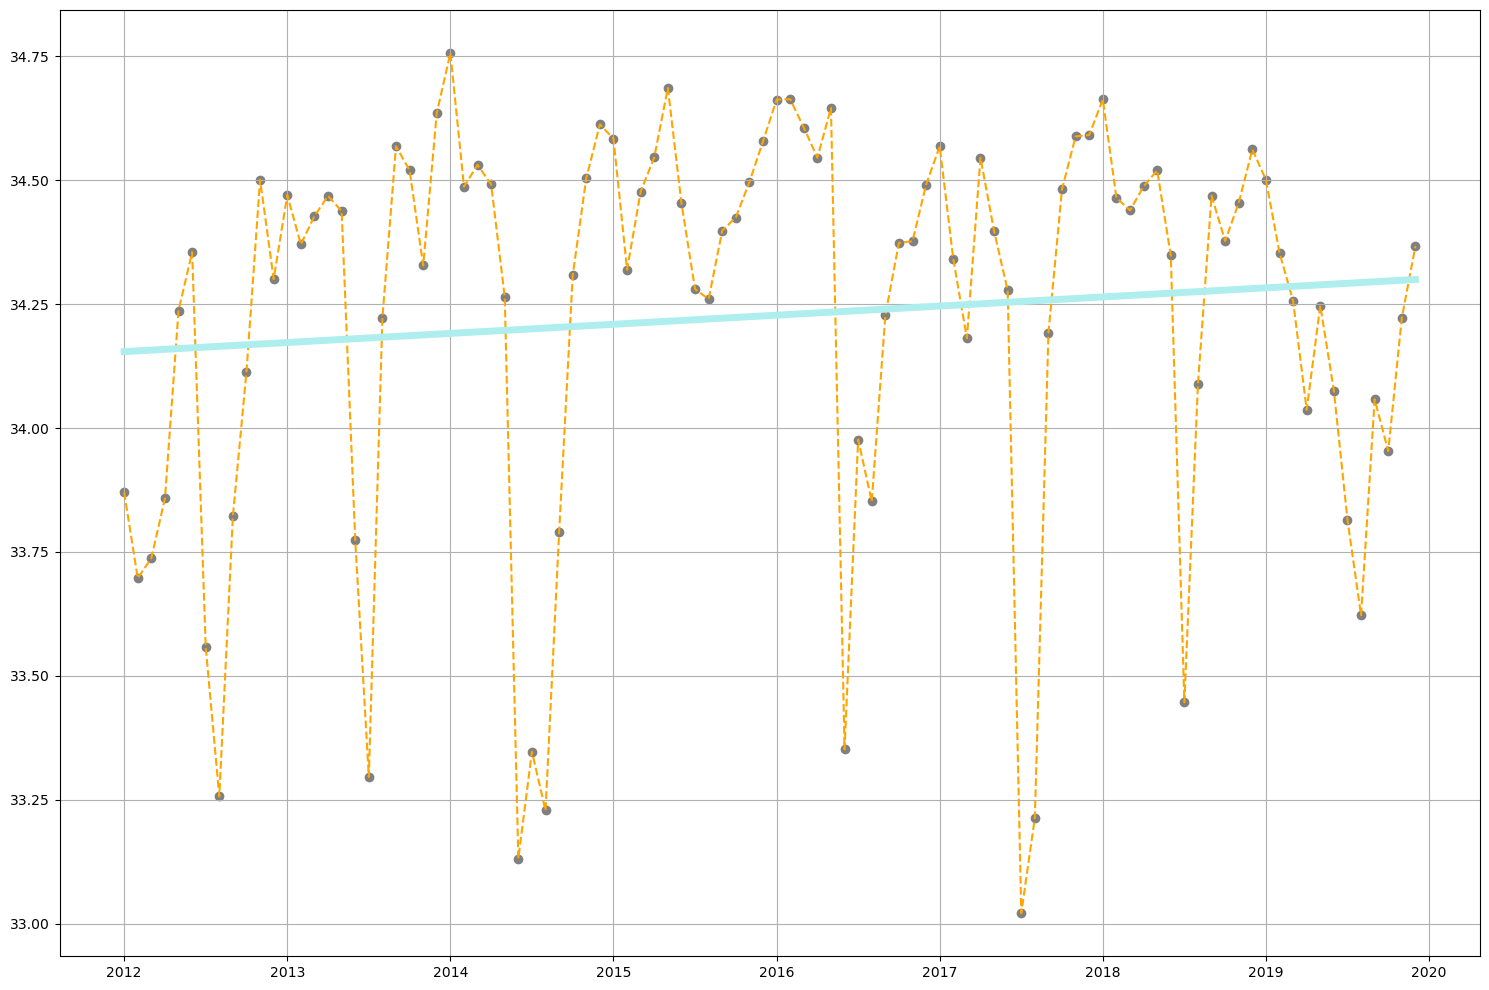

In [13]:
from scipy import stats
mean_list
x = np.arange(0,12*8, 1)
ticks = [0,12,24,36,48,60,72,84,96]
dic = { 0:'2012', 12:'2013', 24:'2014', 36:'2015', 48:'2016', 60:'2017', 72:'2018', 84:'2019', 96:'2020'}
labels = [ticks[i] if t not in dic.keys() else dic[t] for i,t in enumerate(ticks)]

res = stats.linregress(x, mean_list)
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(x, mean_list, '--', color='orange')
plt.scatter(x,mean_list, color='gray')
plt.plot(x, res.intercept + res.slope*x, color='paleturquoise', lw=5)
ax.set_xticks(ticks)

ax.set_xticklabels(labels)
plt.tight_layout()
plt.grid()

## ARGO data

In [23]:
_id = '3901591'
_id2 = '3901620'
argo_path = f's3://escience2022/Ada/ARGO/coriolis/{_id}/{_id}_prof.nc'
argo_path2 = f's3://escience2022/Ada/ARGO/coriolis/{_id2}/{_id2}_prof.nc'

In [24]:
data = xr.open_dataset(s3.open(argo_path))
data2 = xr.open_dataset(s3.open(argo_path2))

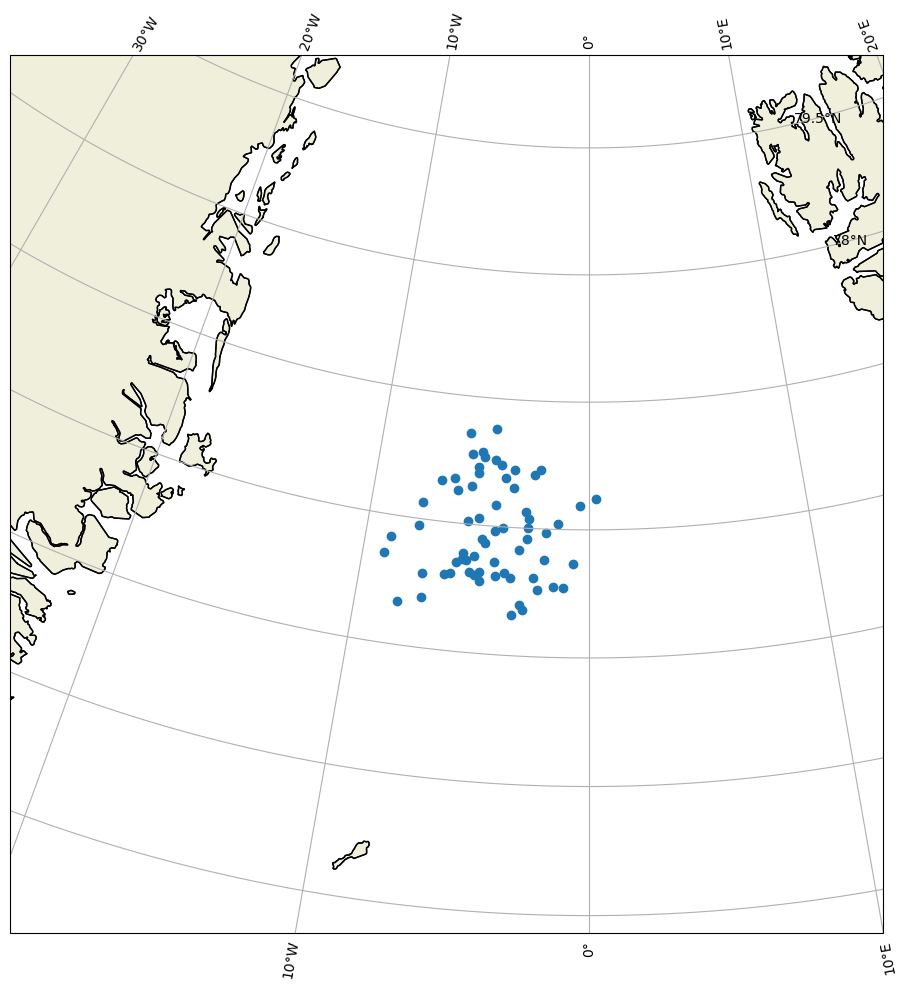

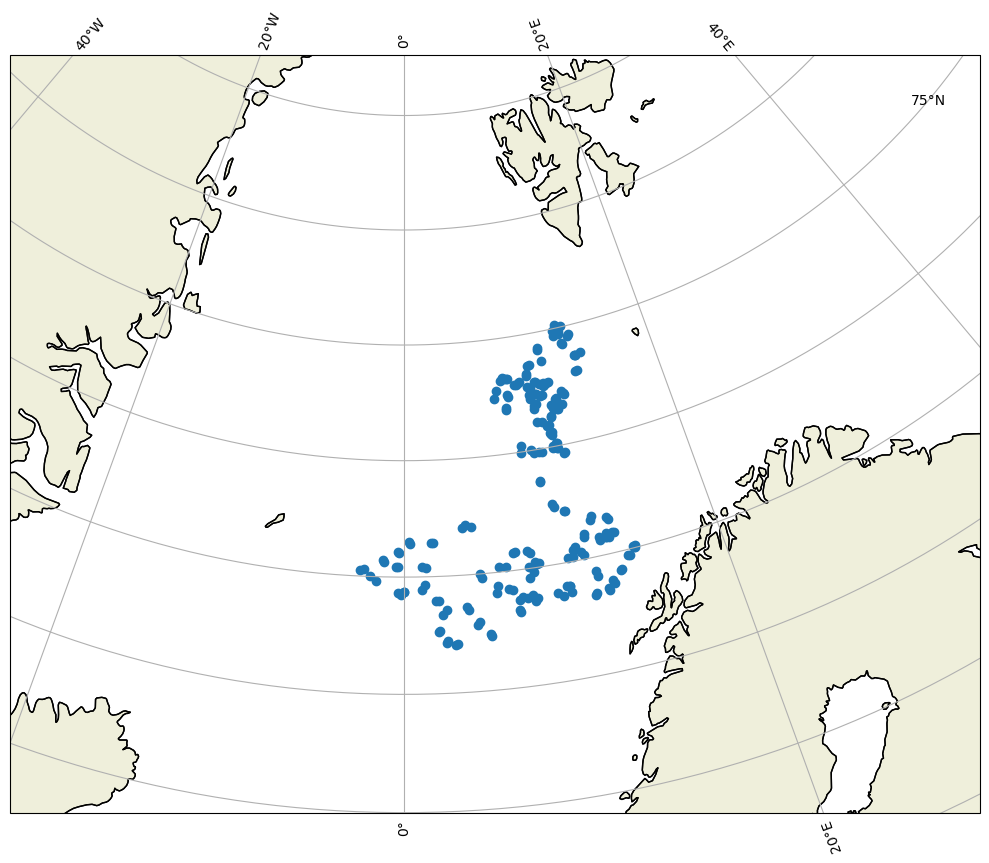

In [25]:
f.plot_argo_positions(data, extent=[-20,10,80,70])
f.plot_argo_positions(data2, extent=[-20,30,80,65])

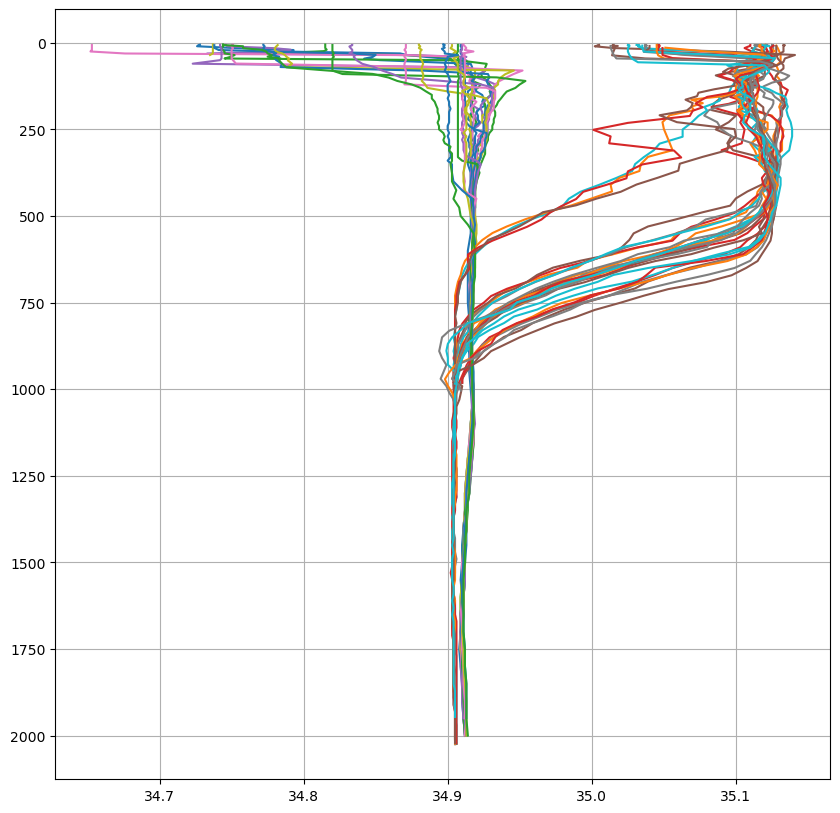

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
for i in range(30):
    plt.plot(data['PSAL_ADJUSTED'][i], data['PRES'][i])
    plt.plot(data2['PSAL_ADJUSTED'][i], data2['PRES'][i])
plt.gca().invert_yaxis()
ax.grid()

In [27]:
data


<xarray.Dataset>
Dimensions:                       (N_PROF: 65, N_PARAM: 3, N_LEVELS: 80,
                                   N_CALIB: 1)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_CALIB
Data variables: (12/52)
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    ...                            ...
    PSAL_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_COMMENT      (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_DATE         (N_PROF, N_CALIB, N_PARAM) object ...
Attributes:
    title:                Argo float aggregated multi-cycle profile
    institution:          US GDAC
    source:               Argo float
    history:              2019-07-02T02:00:05Z
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile

## Model data

In [42]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
cat = col.search(variable_id='so', source_id='UKESM1-0-LL', table_id='Omon', member_id='r2i1p1f2', activity_id='CMIP', experiment_id='historical')

cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,MOHC,UKESM1-0-LL,historical,r2i1p1f2,Omon,so,gn,gs://cmip6/CMIP6/CMIP/MOHC/UKESM1-0-LL/histori...,NaN,20190708


In [43]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [44]:
dataset_list = list(dset_dict.keys())
ds = dset_dict[dataset_list[0]].squeeze()
ds['so']

<xarray.DataArray 'so' (time: 1980, lev: 75, j: 330, i: 360)>
dask.array<getitem, shape=(1980, 75, 330, 360), dtype=float32, chunksize=(5, 75, 330, 360), chunktype=numpy.ndarray>
Coordinates:
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 322 323 324 325 326 327 328 329
    latitude   (j, i) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
  * lev        (lev) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    longitude  (j, i) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
  * time       (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
    member_id  <U8 'r2i1p1f2'
Attributes:
    cell_measures:   area: areacello volume: volcello
    cell_methods:    area: mean where sea time: mean
    comment:         mo: This variable is reported using a z* coordinate syst...
    long_name:       Sea Water Salinity
    original_name:   mo: (variable_name: so)
    original_units:  1e-3
    standard_name:   sea_water_salinity
    units:           0.001

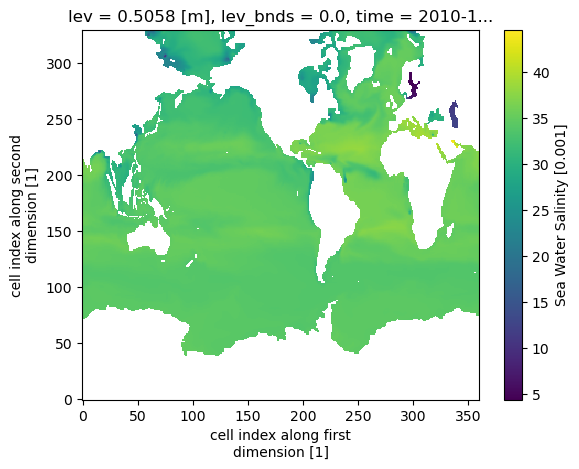

In [45]:
ds = ds.sel(time='2010-10').sel(bnds=0).sel(lev=1, method='nearest').sel(vertices=0).squeeze()
ds['so'].plot.pcolormesh()

/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


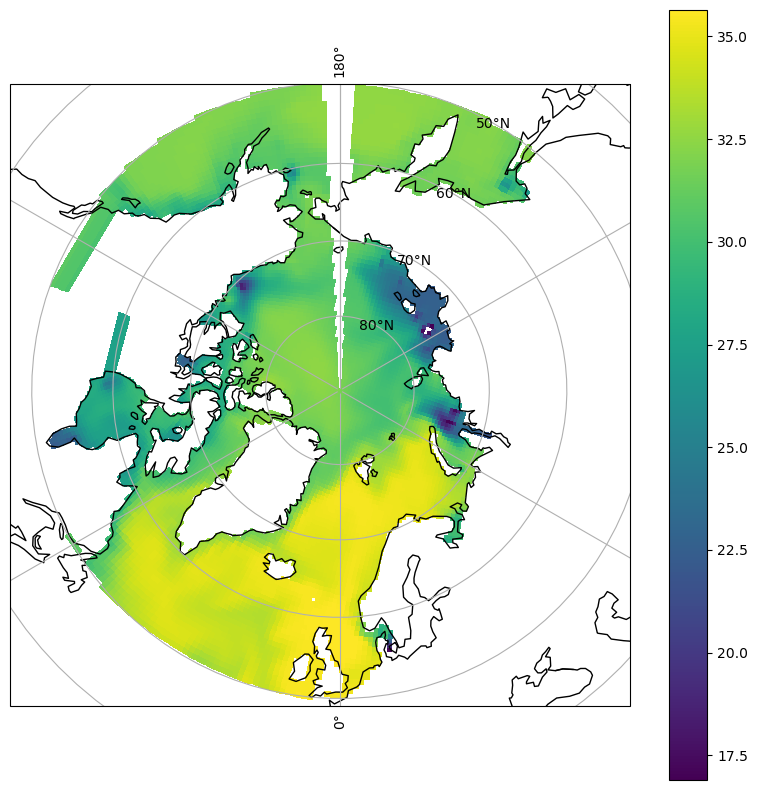

In [46]:
cut = ds.where(
    (ds['latitude'] < 90)
    & (ds['latitude'] > 50)
    & (ds['longitude'] < 177)
    & (ds['longitude'] > -177)
    & (ds['so'] > 15),
    drop=True)

fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection':ccrs.NorthPolarStereo()})
plt.pcolormesh(
    cut['longitude'],
    cut['latitude'],
    cut['so'],
    transform=ccrs.PlateCarree()
    )
plt.colorbar()
ax.gridlines(draw_labels=True)
ax.coastlines()
#ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')



/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


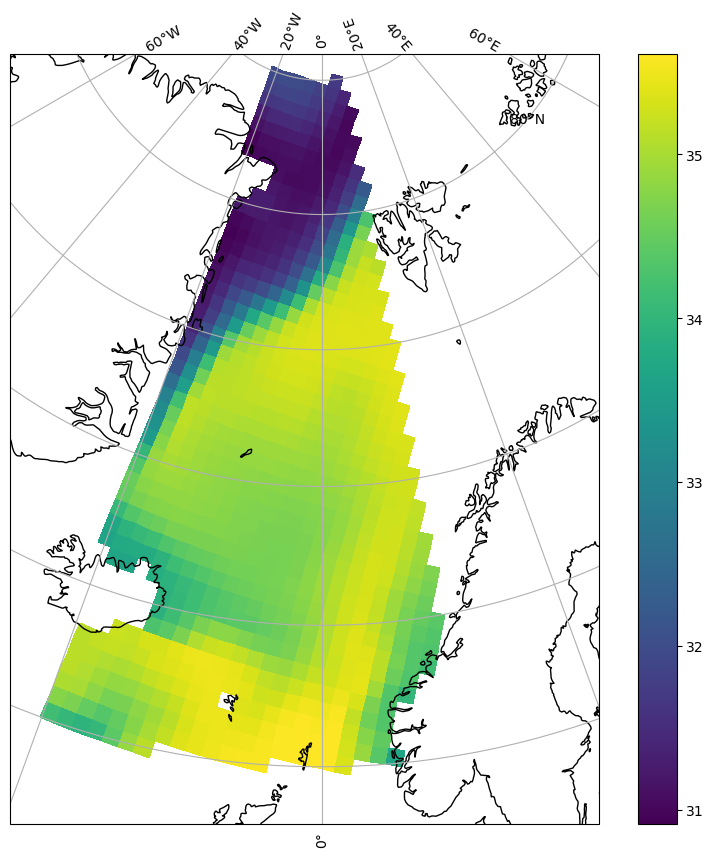

In [47]:
cut = ds.where(
    (ds['latitude'] < 85)
    & (ds['latitude'] > 60)
    & (ds['longitude'] < 10)
    & (ds['longitude'] > -20),
    drop=True)

fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection':ccrs.NorthPolarStereo()})
plt.pcolormesh(
    cut['longitude'],
    cut['latitude'],
    cut['so'],
    transform=ccrs.PlateCarree()
    )
plt.colorbar()
ax.gridlines(draw_labels=True)
ax.coastlines()

/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


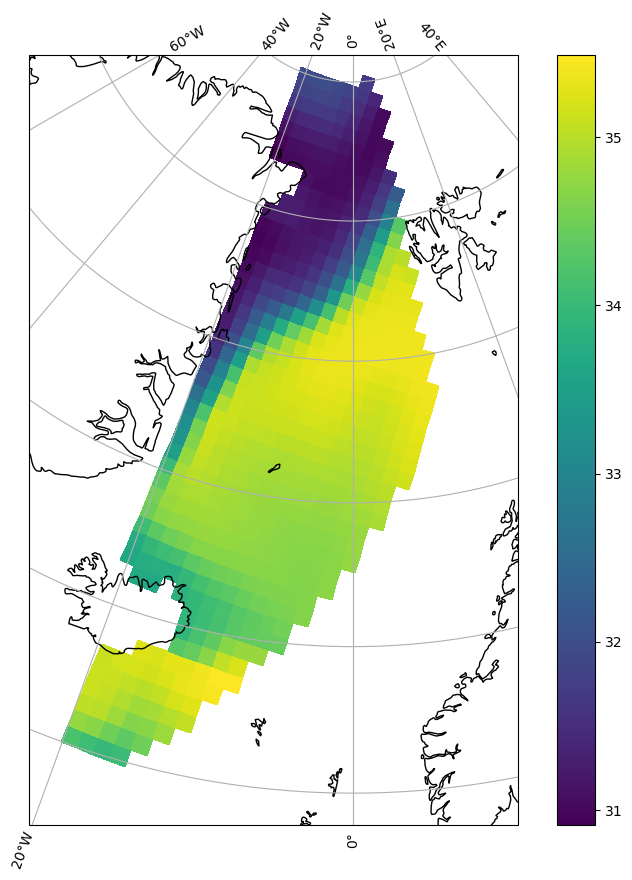

In [50]:
min_lat = np.min(cut['latitude'])
min_lon = (np.min(cut['longitude'][0]))
max_lat = np.max(cut['latitude'])
max_lon = np.max(cut['longitude'][0])
cut = cut.where(cut['latitude']-(cut['longitude']/2) > min(min_lat-min_lon/2-1, max_lat-max_lon/2-1), drop=True)

fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection':ccrs.NorthPolarStereo()})
plt.pcolormesh(
    cut['longitude'],
    cut['latitude'],
    cut['so'],
    transform=ccrs.PlateCarree()
    )
plt.colorbar()
ax.gridlines(draw_labels=True)
ax.coastlines()

In [48]:
month = ds['time.month']
month

<xarray.DataArray 'month' ()>
array(10)
Coordinates:
    lev        float64 0.5058
    lev_bnds   float64 dask.array<chunksize=(), meta=np.ndarray>
    time       object 2010-10-16 00:00:00
    time_bnds  object dask.array<chunksize=(), meta=np.ndarray>
    member_id  <U8 'r2i1p1f2'